In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

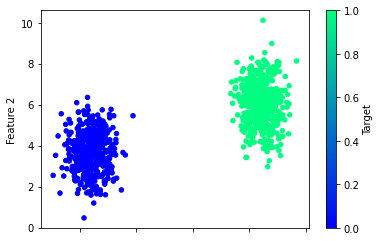

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 692us/step - loss: 0.5651 - accuracy: 0.8257
Epoch 2/100
24/24 [==============================] - 0s 637us/step - loss: 0.5532 - accuracy: 0.9911
Epoch 3/100
24/24 [==============================] - 0s 654us/step - loss: 0.5435 - accuracy: 0.9918
Epoch 4/100
24/24 [==============================] - 0s 694us/step - loss: 0.5221 - accuracy: 0.9951
Epoch 5/100
24/24 [==============================] - 0s 664us/step - loss: 0.5174 - accuracy: 0.9965
Epoch 6/100
24/24 [==============================] - 0s 653us/step - loss: 0.5006 - accuracy: 0.9963
Epoch 7/100
24/24 [==============================] - 0s 632us/step - loss: 0.4884 - accuracy: 0.9919
Epoch 8/100
24/24 [==============================] - 0s 655us/step - loss: 0.4838 - accuracy: 0.9941
Epoch 9/100
24/24 [==============================] - 0s 643us/step - loss: 0.4593 - accuracy: 0.9953
Epoch 10/100
24/24 [==============================] - 0s 647us/step - loss: 0.4509 - accura

24/24 [==============================] - 0s 591us/step - loss: 0.1012 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 610us/step - loss: 0.0961 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 791us/step - loss: 0.1016 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 639us/step - loss: 0.0906 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 639us/step - loss: 0.0909 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 584us/step - loss: 0.0891 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 601us/step - loss: 0.0860 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 602us/step - loss: 0.0862 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 608us/step - loss: 0.0873 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 606us/step - loss: 0.0817 - accuracy: 

<AxesSubplot:>

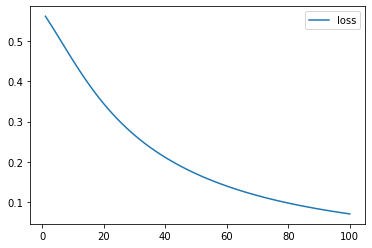

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

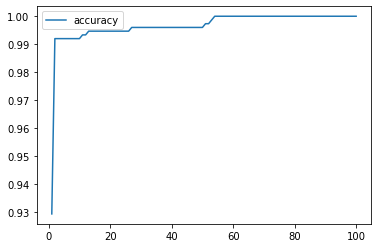

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0722 - accuracy: 1.0000
Loss: 0.07216551154851913, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [15]:
################################# 19.2.4 #########################################

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

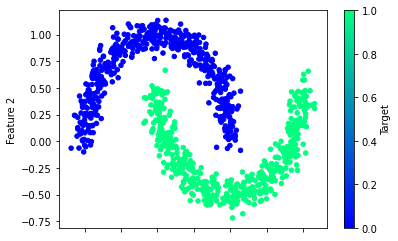

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2245 - accuracy: 0.4387
Epoch 2/100
24/24 [==============================] - 0s 972us/step - loss: 1.0999 - accuracy: 0.4573
Epoch 3/100
24/24 [==============================] - 0s 965us/step - loss: 1.0147 - accuracy: 0.4733
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9554 - accuracy: 0.4853
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9107 - accuracy: 0.4907
Epoch 6/100
24/24 [==============================] - 0s 944us/step - loss: 0.8743 - accuracy: 0.5027
Epoch 7/100
24/24 [==============================] - 0s 956us/step - loss: 0.8449 - accuracy: 0.5107
Epoch 8/100
24/24 [==============================] - 0s 924us/step - loss: 0.8191 - accuracy: 0.5173
Epoch 9/100
24/24 [==============================] - 0s 980us/step - loss: 0.7976 - accuracy: 0.5293
Epoch 10/100
24/24 [==============================] - 0s 998us/step - loss: 0.7777 - accuracy: 0.

24/24 [==============================] - 0s 935us/step - loss: 0.3406 - accuracy: 0.8280
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8307
Epoch 83/100
24/24 [==============================] - 0s 934us/step - loss: 0.3349 - accuracy: 0.8307
Epoch 84/100
24/24 [==============================] - 0s 944us/step - loss: 0.3323 - accuracy: 0.8320
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8347
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3271 - accuracy: 0.8413
Epoch 87/100
24/24 [==============================] - 0s 978us/step - loss: 0.3246 - accuracy: 0.8427
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8467
Epoch 89/100
24/24 [==============================] - 0s 990us/step - loss: 0.3201 - accuracy: 0.8507
Epoch 90/100
24/24 [==============================] - 0s 992us/step - loss: 0.3179 - accuracy: 0.8507
E

<AxesSubplot:>

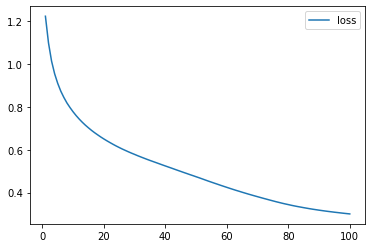

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

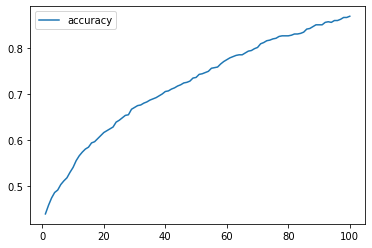

In [20]:
# Plot the loss
history_df.plot(y="accuracy")

In [21]:
############## 19.2.5

In [22]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 676us/step - loss: 0.8510 - accuracy: 0.3269
Epoch 2/100
24/24 [==============================] - 0s 697us/step - loss: 0.7905 - accuracy: 0.3457
Epoch 3/100
24/24 [==============================] - 0s 661us/step - loss: 0.7434 - accuracy: 0.4120
Epoch 4/100
24/24 [==============================] - 0s 707us/step - loss: 0.7115 - accuracy: 0.5027
Epoch 5/100
24/24 [==============================] - 0s 715us/step - loss: 0.6732 - accuracy: 0.5701
Epoch 6/100
24/24 [==============================] - 0s 667us/step - loss: 0.6375 - accuracy: 0.6211
Epoch 7/100
24/24 [==============================] - 0s 699us/step - loss: 0.6060 - accuracy: 0.7115
Epoch 8/100
24/24 [==============================] - 0s 699us/step - loss: 0.5857 - accuracy: 0.7515
Epoch 9/100
24/24 [==============================] - 0s 656us/step - loss: 0.5600 - accuracy: 0.7818
Epoch 10/100
24/24 [==============================] - 0s 694us/step - loss: 0.5298 - accura

24/24 [==============================] - 0s 669us/step - loss: 0.1829 - accuracy: 0.9275
Epoch 82/100
24/24 [==============================] - 0s 664us/step - loss: 0.1956 - accuracy: 0.9217
Epoch 83/100
24/24 [==============================] - 0s 643us/step - loss: 0.2071 - accuracy: 0.9056
Epoch 84/100
24/24 [==============================] - 0s 634us/step - loss: 0.2005 - accuracy: 0.9274
Epoch 85/100
24/24 [==============================] - 0s 623us/step - loss: 0.2213 - accuracy: 0.9065
Epoch 86/100
24/24 [==============================] - 0s 631us/step - loss: 0.2099 - accuracy: 0.9131
Epoch 87/100
24/24 [==============================] - 0s 683us/step - loss: 0.2019 - accuracy: 0.9083
Epoch 88/100
24/24 [==============================] - 0s 671us/step - loss: 0.2290 - accuracy: 0.8902
Epoch 89/100
24/24 [==============================] - 0s 650us/step - loss: 0.2017 - accuracy: 0.9103
Epoch 90/100
24/24 [==============================] - 0s 619us/step - loss: 0.1983 - accuracy: 